In [1]:
import os
import re
import sys

sys.path.append(os.path.join('..'))
sys.path.append(os.path.join('..', 'src'))
sys.path.append(os.path.join('..', 'src', 'libs'))

from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import nmrglue as ng

from ami_utils import parse as pa

In [2]:
path = f'C:\\Users\\BertossL\\Documents\\NMR\\Mebip'

dic, data = ng.bruker.read_pdata(os.path.join(path, '1', 'pdata', '1'))
udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic, 0)

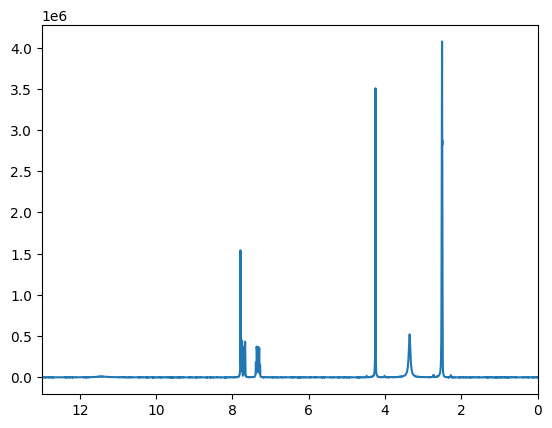

In [3]:
fig, ax = plt.subplots()

ax.set_xlim(13, 0)
ax.plot(uc.ppm_scale(), data)

In [16]:
%matplotlib qt

dic, data = ng.bruker.read(os.path.join(path, '1'))

# remove the digital filter
data = ng.bruker.remove_digital_filter(dic, data)

# process the spectrum
data = ng.proc_base.zf_size(data, 32768)    # zero fill to 32768 points
data = ng.proc_base.fft(data)               # Fourier transform
data = ng.proc_base.ps(data, p0=-50.0)      # phase correction
data = ng.proc_base.di(data)                # discard the imaginaries
data = ng.proc_base.rev(data)               # reverse the data
data = ng.proc_bl.cbf(data)

udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic, 0)

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(13, 0)
ax.plot(uc.ppm_scale(), data)